## Iris Flower Classification

### Problem Statement:

To train a machine learning model that can learn from the measurements of Iris flowers and accurately classify those into their respective species.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing titanic dataset
data = pd.read_csv("C:\\Vikram\\Datasets\\IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Visualization:

Let us now visualize classes of flowers based on their species.

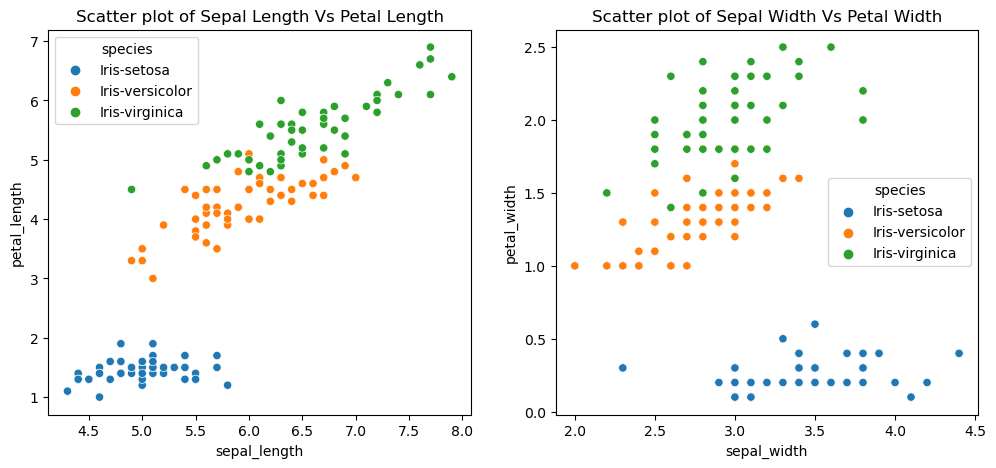

In [3]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=data,x='sepal_length',y='petal_length',hue='species')
plt.title("Scatter plot of Sepal Length Vs Petal Length")
plt.subplot(1,2,2)
sns.scatterplot(data=data,x='sepal_width',y='petal_width',hue='species')
plt.title("Scatter plot of Sepal Width Vs Petal Width")
plt.show()

### Observations from the Graphs:
- Iris flowers with Setosa species have lowest sepal as well as petal lengths.
- Iris flowers with Virginica species have highest sepal as well as petal lengths.
- All species of Iris flower have similar sepeal width.
- All three species are distinctly scattered in both the graphs.

### Preparing data to fit classification models

We will split the data into **features** and **labels**. Features are the independent variables used for classification. While we will use labels to train the model for classification.

In [4]:
# Features
X = data.drop('species', axis=1)
# Lables
y = data.species

### Model Selection:

#### K Fold cross validation

We will use K Fold validation technique to test the performance of classification model and choose best model with highest accuracy score.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [7]:
LRs = cross_val_score(LogisticRegression(),X,y, cv = skf)
LRs.mean()

0.9666666666666668

In [8]:
RFs = cross_val_score(RandomForestClassifier(),X,y, cv=skf)
RFs.mean()

0.9533333333333335

In [9]:
SVs = cross_val_score(SVC(),X,y, cv = skf)
SVs.mean()

0.9666666666666666

In [10]:
NBs = cross_val_score(MultinomialNB(),X,y, cv=skf)
NBs.mean()

0.9533333333333335

### Observations:

This shows that the Logistic Regression performs better with maximum score compared to rest of the classification algorithms. So we will use Logistic Regression for classification.

### Train-Test Data:

Let us now split the data for training the Logistic Regression model.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
# Fitting the model on train dataset
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9666666666666667

This gives that the Logistic Regression model correctly classifies the iris flowers based on their species with **96.67%** accuracy.

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Using confusion matrix, we can observe that the model correctly classified 28 flowers into correct their respective groups (or species) and incorrectly classified 2 flowers in other groups (or species).

In [14]:
# Construct a dataframe for actual and predicted values
y_pred = pd.Series(y_pred, index=y_test.index)
new = pd.concat([y_test,y_pred], axis=1)
new.columns = ['Actual','Predicted']
new.head()

,Actual,Predicted
14,Iris-setosa,Iris-setosa
98,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
16,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica
